![image](JMUlogo.png)   

> # Math 248 Fall 2021
>                                                      
> # Computers and Numerical Algorithms                                                                                                     
> # Instructor: Hala Nelson
>
> # Week 5 Notes: Visualizing Matrices, Singular Value Decomposition, and Image Compression Application

# We can factorize a scalar number in multiple ways. The same can be done for matrices of numbers:
We can factorize the number $12=4\times 3$ or $12=2\times 2\times 3$. Which factorization is better depends on our use case. 

The idea is that we want to break down an object into its smaller components, and these components give us insight about the function and the action of the object itself. This breakdown into smaller components might also give us an idea on which components contain the most information about the object, and hence are more important than others. In that case, we might benefit from throwing away the less important components, and building a smaller object with similar function. The smaller object might not be as detailed and fancy as the object we started with, that contained all its components, however, it will contain enough important information from the original object that using it with its smaller size gives us an advantage. 

The same can be done for matrices of numbers. Linear algebra provides us with a variety of useful matrix factorizations, which break down a matrix into smaller components. Again which factorization is better depends on the use case. One very important matrix factorization that has a wide range of applications in image processing, data analysis, natural language processing, is the singular value decomposition: $$C_{m\times n}=U_{m\times m}\Sigma_{m\times n} V^t_{n\times n}.$$

Here, we break down the matrix $C$ into three components: $U$, $\Sigma$, and $V^t$: $U$ and $V$ are square matrices and have orthonormal columns, and $\Sigma$ is a diagnal matrix that has the same shape as $C$. Note that since $V$ has orthonormal columns, then its transpose $V^t$ has orthonormal rows.

# In this notebook we will learn:
> ## 1. How to visualize matrices as images and vice versa, then use the Singular Value Decomposition to reduce the size of our images without losing the most essential information in the image. 
>
> ## 2. How this simple matrix factorization (the Singular Value Decomposition) shows us the action of the matrix on space itself: rotating and/or reflecting, stretching and squeezing: 
Imagine you are sitting in your living room (three dimensional space) then suddenly a matrix of numbers $C$ acts on the space you are sitting in. This is what will happen: The whole living room, including you, will get rotated, then the room, and you, will get stretched and/or squeezed in three different directions, then the rotated stretched/squeezed room, and you, will get rotated again. This summarizes the action a matrix of numbers has on space, and on all the vectors living in that space. Mathematically, the Singular Value Decomposition of the matrix $C_{m\times n}=U_{m\times m}\Sigma_{m\times n} V^t_{n\times n}$ provides the accurate description of the three things that happened to you and the space you were living in when the matrix $C$ acted (got multiplied by) on you. $V^t$ rotates you and your living room, $\Sigma$ stretches and/or squeezes you in different directions, and $U$ rotates the stretched/squeezed you and your living room again. 

# In this notebook we will not learn:
> ## How to compute the singular value decomposition of a matrix. We will instead use Python to compute it. However, we will understand how it works and why this decomposition is important to reduce the size of a given problem without losing the essential information in the problem. After we master these ideas, we will learn how to compute it efficiently. 
# Recall matrix multiplication:
Let $A$ be a matrix with $3$ rows and $3$ columns:
$A = \begin{pmatrix}1 & 2 & 3 \\4 & 5 & 6 \\7 & 8 & 9\end{pmatrix}_{3\times 3}$ and let $B$ be matrix with $3$ rows and $2$ columns: $B =\begin{pmatrix}1 & 3  \\4 & -2  \\0 & 1\end{pmatrix}_{3\times 2}$, then AB is a matrix with $3$ rows and $2$ columns: $ C_{3\times 2}=A_{3\times 3}B_{3\times 2}= \begin{pmatrix}1 & 2 & 3 \\4 & 5 & 6 \\7 & 8 & 9\end{pmatrix}_{3\times 3}$$\begin{pmatrix}1 & 3  \\4 & -2  \\0 & 1\end{pmatrix}_{3\times 2}$$= \begin{pmatrix}9 & 2  \\24 & 8  \\39 & 14 \end{pmatrix}_{3\times 2}.$

We can think of $C$ as being factorized into the product of $A$ and $B$, in the same way the number $6=3\times 2$. The important factorization for us in this notebook is the Sigular Value Decomposition:

$$C_{3\times 2}=U_{3\times 3}\Sigma_{3\times 2} V^t_{2\times 2}.$$
___

# Let's input $A$ and $B$ into Python then visualize them as images:
The value of an entry of the matrix corresponds to the intensity of the corresponding pixel. The higher the number the brighter the pixel. Smaller numbers in the matrix show up as darker pixels and larger numbers show up as brighter pixels. I will visualize A in color and B in greyscale. 

Recall, $A = \begin{pmatrix}1 & 2 & 3 \\4 & 5 & 6 \\7 & 8 & 9\end{pmatrix}$ and $B =\begin{pmatrix} 1 & 3\\4&-2\\0 & 1\end{pmatrix}$.

In [39]:
# Define A and B as numpy arrays. Enter them one row at a time.
import numpy as np
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[1,3],[4,-2],[0,1]])

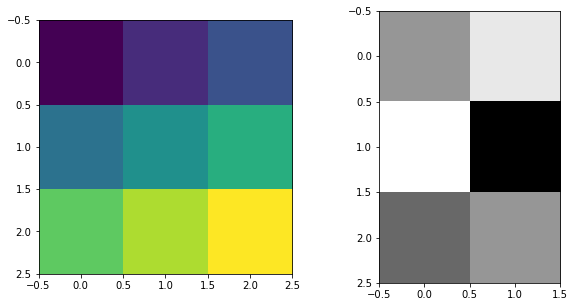

In [40]:
from matplotlib import pyplot as plt
# This is for controlling the color map since I want grey scale
import matplotlib.cm as cm
# split the figure into 2 subplots
fig, graph=plt.subplots(nrows = 1, ncols=2, figsize=(10,5))
graph[0].imshow(A)
graph[1].imshow(B, cmap=cm.Greys_r)

# Diagonal matrices act like scalar numbers so they are very special and desirable: 

Multiplying by a diagonal matrix corresponds to stretching or squeezing of certain directions in space. Let's visualize a rectangular matrix with decreasing "diagonal" values on a greyscale. The brightest diagonal pixel will be in the top right corner then the intensity will decrease along the diagonal.  

$C = \begin{pmatrix}10 & 0 & 0&0\\0 & 6 & 0&0 \\0 & 0 & 3&0\\0&0&0&1\\0&0&0&0\end{pmatrix}$

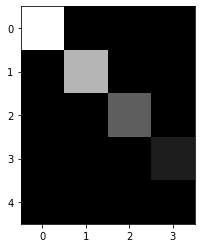

In [110]:
C=np.array([[10,0,0,0],[0,6,0,0],[0,0,3,0],[0,0,0,1],[0,0,0,0]])
plt.imshow(C, cmap=cm.Greys_r)

# Any matrix $A$ can be made equivalent to a diagonal matrix of similar shape to $A$ up to two rotations. This is accomplished using the Singular Value Decomposition of $A$ 
$$A=U\Sigma\ V^t$$
The singular value decomposition has far reaching applications in data analysis (principal component analsis), image processing, and natural language processing (latent semantic analysis). 
The singular value decomposition captures the action of any matrix on space itself. First it rotates it through the orthogonal matrix $V^t$, then stretches it or squeezes it in special directions through the diagonal matrix $\Sigma$, then rotates it again through the orthogonal matrix $U$. The rotations do not change space much, the stretching and squeezing encoded in the diagonal matrix $\Sigma$ are the most informative of the action of $A$. The diagonal entries of $\Sigma$ are called the singular values of $A$. 

# Let's use Python to find the Singular Value Decomposition of a square matrix
$$A = \begin{pmatrix}1 & 2 & 3 \\4 & 5 & 6 \\7 & 8 & 9\end{pmatrix}=U\Sigma\ V^t$$


U=
 [[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]
sigma=
 [1.68481034e+01 1.06836951e+00 3.33475287e-16]
Sigma=
 [[1.68481034e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.06836951e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.33475287e-16]]
Vt=
 [[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]
product=
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


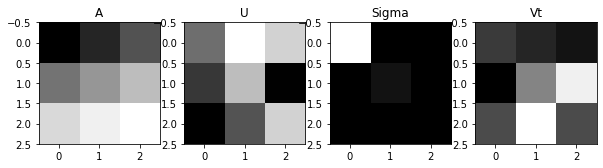

In [42]:
U,sigma,Vt=np.linalg.svd(A)
print("U=\n",U)
print("sigma=\n",sigma)
# store sigma in a diagonal matrix that has the same shape as A
Sigma=np.diag(sigma)
print("Sigma=\n",Sigma)
print("Vt=\n",Vt)

# Let's test if we got the right thing by multiplying U*sigma*transpose of V and recovering A
product=U.dot(Sigma.dot(Vt))
print("product=\n",product)

# Let's visualize the above product
# split the figure into 4 subplots
fig, graph=plt.subplots(nrows = 1, ncols=4, figsize=(10,5))
graph[0].imshow(A,cmap=cm.Greys_r)
graph[0].title.set_text('A')
graph[1].imshow(U,cmap=cm.Greys_r)
graph[1].title.set_text('U')
graph[2].imshow(Sigma,cmap=cm.Greys_r)
graph[2].title.set_text('Sigma')
graph[3].imshow(Vt,cmap=cm.Greys_r)
graph[3].title.set_text('Vt')

# Let's work with a wide rectangular matrix
$$A= \begin{pmatrix}-1 & 3 & -5 & 4 & 18 \\1 & -2 & 4 & 0 & -7 \\2 & 0 & 4 & -3& -8\end{pmatrix}_{3\times5}=U_{3\times 3}\Sigma_{3\times 5} V^*_{5\times 5}$$

A=
 [[-1  3 -5  4 18]
 [ 1 -2  4  0 -7]
 [ 2  0  4 -3 -8]]
U=
 [[-0.84325482 -0.44137775 -0.30676862]
 [ 0.35017445 -0.01811286 -0.93650936]
 [ 0.40779794 -0.89713856  0.16983296]]
sigma=
 [22.90450542  2.63075845  2.54219223]
Sigma=
 [[22.90450542  0.          0.          0.          0.        ]
 [ 0.          2.63075845  0.          0.          0.        ]
 [ 0.          0.          2.54219223  0.          0.        ]]
Vt=
 [[ 0.0877131  -0.14102524  0.31645144 -0.20067725 -0.91214331]
 [-0.52114713 -0.48955751 -0.55273676  0.35195351 -0.24361837]
 [-0.1141042   0.37476036 -0.60296877 -0.68310072 -0.12781617]
 [ 0.18537095  0.66670183 -0.24456293  0.60750984 -0.30375492]
 [ 0.82056683 -0.39434588 -0.41347092  0.01275003 -0.00637501]]
product=
 [[-1.00000000e+00  3.00000000e+00 -5.00000000e+00  4.00000000e+00
   1.80000000e+01]
 [ 1.00000000e+00 -2.00000000e+00  4.00000000e+00  2.57367522e-16
  -7.00000000e+00]
 [ 2.00000000e+00 -6.56532547e-15  4.00000000e+00 -3.00000000e+00
  -8.000

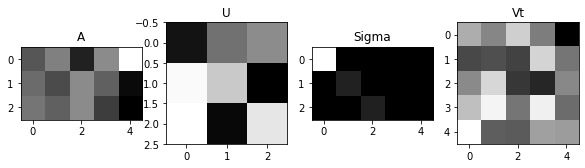

In [43]:
# Define A as a numpy array
A=np.array([[-1,3,-5,4,18],[1,-2,4,0,-7],[2,0,4,-3,-8]])
print("A=\n",A)
# Find the singular value decomposition of A
U,sigma,Vt=np.linalg.svd(A)
print("U=\n",U)
print("sigma=\n",sigma)
# store sigma in a diagonal matrix that has the same shape as A
Sigma=np.zeros(A.shape) # Sigma has the same shape as A
m=np.amin(A.shape) # pick the smaller number between the number of rows and columns 
Sigma[0:m,0:m]=np.diag(sigma) # place the singular values on the diagnal of Sigma
print("Sigma=\n",Sigma)
print("Vt=\n",Vt)

# Let's test if we got the right thing by multiplying U*sigma*transpose of V and recovering A
product=U.dot(Sigma.dot(Vt))
print("product=\n",product)

# Let's visualize the above product
# split the figure into 4 subplots
fig, graph=plt.subplots(nrows = 1, ncols=4, figsize=(10,5))
graph[0].imshow(A,cmap=cm.Greys_r)
graph[0].title.set_text('A')
graph[1].imshow(U,cmap=cm.Greys_r)
graph[1].title.set_text('U')
graph[2].imshow(Sigma,cmap=cm.Greys_r)
graph[2].title.set_text('Sigma')
graph[3].imshow(Vt,cmap=cm.Greys_r)
graph[3].title.set_text('Vt')

# Let's work with a long rectangular matrix 
$$A=\begin{pmatrix}5&4\\4&0\\7&10\\-1&8\end{pmatrix}_{4\times2}=U_{4\times4}\Sigma_{4\times2}V^*_{2\times2}$$

A=
 [[ 5  4]
 [ 4  0]
 [ 7 10]
 [-1  8]]
U=
 [[ 0.39629242  0.34653384 -0.83964859 -0.13362956]
 [ 0.1352328   0.52912403  0.15106924  0.82396477]
 [ 0.80478595  0.13878907  0.48652003 -0.3104117 ]
 [ 0.42069464 -0.76202339 -0.18832575  0.4548294 ]]
sigma=
 [15.12602295  6.49641669]
Sigma=
 [[15.12602295  0.        ]
 [ 0.          6.49641669]
 [ 0.          0.        ]
 [ 0.          0.        ]]
Vt=
 [[ 0.51138362  0.85935254]
 [ 0.85935254 -0.51138362]]
product=
 [[ 5.00000000e+00  4.00000000e+00]
 [ 4.00000000e+00  5.21753947e-16]
 [ 7.00000000e+00  1.00000000e+01]
 [-1.00000000e+00  8.00000000e+00]]


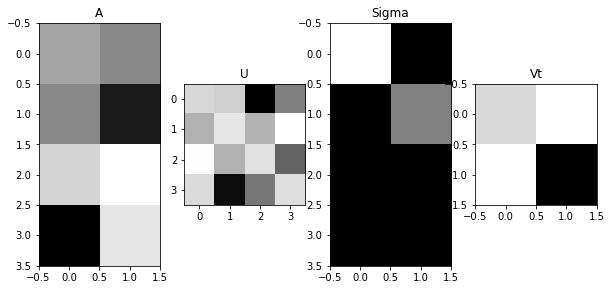

In [44]:
# Define A as a numpy array
A=np.array([[5,4],[4,0],[7,10],[-1,8]])
print("A=\n",A)
# Find the singular value decomposition of A
U,sigma,Vt=np.linalg.svd(A)
print("U=\n",U)
print("sigma=\n",sigma)
# store sigma in a diagonal matrix that has the same shape as A
Sigma=np.zeros(A.shape) # Sigma has the same shape as A
m=np.amin(A.shape) # pick the smaller number between the number of rows and columns 
Sigma[0:m,0:m]=np.diag(sigma) # place the singular values on the diagnal of Sigma
print("Sigma=\n",Sigma)
print("Vt=\n",Vt)

# Let's test if we got the right thing by multiplying U*sigma*transpose of V and recovering A
product=U.dot(Sigma.dot(Vt))
print("product=\n",product)

# Let's visualize the above product
# split the figure into 4 subplots
fig, graph=plt.subplots(nrows = 1, ncols=4, figsize=(10,5))
graph[0].imshow(A,cmap=cm.Greys_r)
graph[0].title.set_text('A')
graph[1].imshow(U,cmap=cm.Greys_r)
graph[1].title.set_text('U')
graph[2].imshow(Sigma,cmap=cm.Greys_r)
graph[2].title.set_text('Sigma')
graph[3].imshow(Vt,cmap=cm.Greys_r)
graph[3].title.set_text('Vt')

# Let's apply Singular Value Decomposition to images
We will see how we can throw away insignificant singular values and retain most of the information in the image. This allows us to work with a lower rank matrix (hence a smaller problem size) while still keeping the essential information from the original larger size problem. We will work with this image:

![image](PictureOfUs.jpg)

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (960, 714, 3)
Image Height 960
Image Width 714
Dimension of Image 3


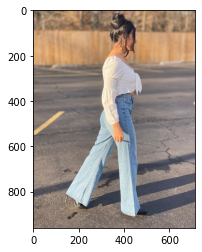

In [45]:
# Let's read the image file. It will be saved as 3 dimensional array, one layer for each channel.
picture = plt.imread("PictureOfUs.jpg")
# Let's see how python saves this image file
print('Type of the image : ' , type(picture))
print(f'Shape of the image : {picture.shape}')
print(f'Image Height {picture.shape[0]}')
print(f'Image Width {picture.shape[1]}')
print(f'Dimension of Image {picture.ndim}')
# Let's display the image
plt.imshow(picture)

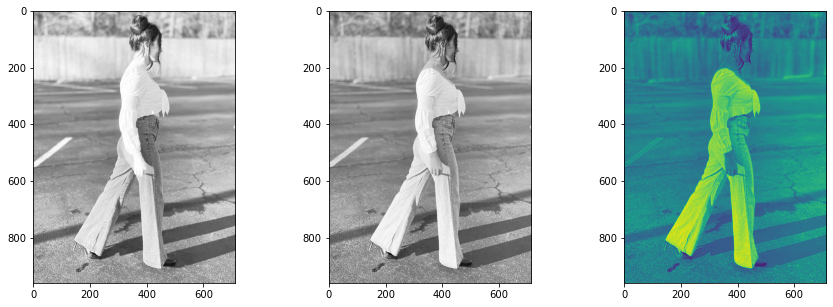

In [57]:
# Let's save each channel in its own two dimensional matrix
R=picture[:,:,0] # red channel
G=picture[:,:,1] # green channel
B=picture[:,:,2] # blue channel
# Let's display these three channels. I will plot first two on grey scale and the third on color scale
fig, graph = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))
graph[0].imshow(R,cmap=cm.Greys_r)
graph[1].imshow(G,cmap=cm.Greys_r)
graph[2].imshow(B)

> ## If I want to see the actual red, green and blue tints for each channel, I have to layer each of them with two zero layers, since a computer image is always made up of three layers. 

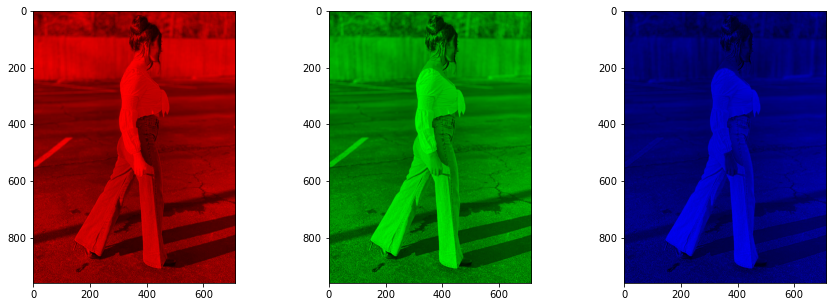

In [59]:
# Define new zero channel
z=np.zeros(np.shape(R))
# scale all the pixels to numbers between 0 and 1 (instead of between 0 and 255, unless you are sure those were all integers)
R1=R/255
G1=G/255
B1=B/255
# red channel stays, others zero
red_tint=np.dstack((R1,z,z))
# green channel stays, others zero
green_tint=np.dstack((z,G1,z))
# blue channel stays, others zero
blue_tint=np.dstack((z,z,B1))
# split the figure into 3 subplots
fig, subs=plt.subplots(nrows = 1, ncols=3, figsize=(15,5))
subs[0].imshow(red_tint)
subs[1].imshow(green_tint)
subs[2].imshow(blue_tint)

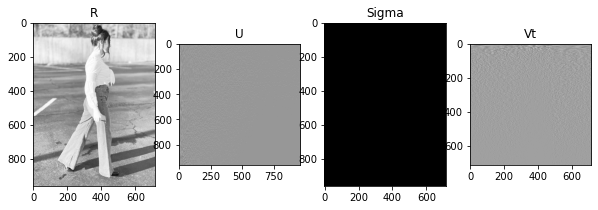

In [74]:
# Choose a channel and perform singular value decomposition. Do not print the matrices
# since they are very big, just show their image
# Find the singular value decomposition of R
U,sigma,Vt=np.linalg.svd(R)
# store sigma in a diagonal matrix that has the same shape as R
Sigma=np.zeros(R.shape) # Sigma has the same shape as R
m=np.amin(R.shape) # pick the smaller number between the number of rows and columns 
Sigma[0:m,0:m]=np.diag(sigma) # place the singular values on the diagnal of Sigma
# Let's visualize the above product
# split the figure into 4 subplots
fig, graph=plt.subplots(nrows = 1, ncols=4, figsize=(10,5))
graph[0].imshow(R,cmap=cm.Greys_r)
graph[0].title.set_text('R')
graph[1].imshow(U,cmap=cm.Greys_r)
graph[1].title.set_text('U')
graph[2].imshow(Sigma,cmap=cm.Greys_r)
graph[2].title.set_text('Sigma')
graph[3].imshow(Vt,cmap=cm.Greys_r)
graph[3].title.set_text('Vt')

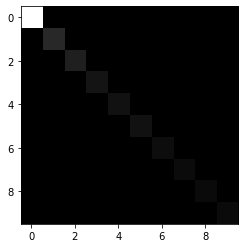

In [101]:
# Let's show only the first 10 diagonal entries of Sigma
plt.imshow(Sigma[0:10,0:10],cmap=cm.Greys_r)

# Now we will zero out smaller singular values and keep only the first 50.
Note that most of the information in the image will be retained while the size of the problem is significantly reduced (we originally had 763 nonzero singular values). The new matrix we will plot will be 
$$R=U\Sigma_{new}V^*$$
where we use the same $U$ and $V^*$ as before and the diagonal matrix $\Sigma_{new}$ has only the first $50$ singular values of the original $\Sigma$.

The original number of nonzero singular values is 714


Text(0.5, 1.0, 'Keep only 50 singular values')

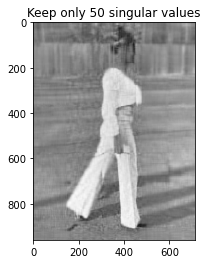

In [76]:
print(f"The original number of nonzero singular values is {len(sigma)}")
# Let's keep the first 50 singular values
reduced_sigma=sigma
reduced_sigma[50:len(sigma)+1]=0
# Let's redefine Sigma with the reduced number of singular values
Sigma_1=np.zeros(R.shape) # Sigma has the same shape as R
Sigma_1[0:m,0:m]=np.diag(reduced_sigma)
# Let's multiply U*Sigma*Vt and show its image
product_r=U.dot(Sigma_1.dot(Vt))
plt.imshow(product,cmap=cm.Greys_r)
plt.title("Keep only 50 singular values")

# Physically reduce the size of $U$, $\Sigma$ and $V^*$ instead of asking the computer to do a bunch of useless multiplications by zero
Throw away $\sigma_{r+1}, \sigma_{r+2},\dots, \sigma_{last}$, reduce the size of $\Sigma$ to $r\times r$, throw away the columns of $U$ starting at $U_{r+1}$, and throw away the rows of $V^*$ starting at $V^*_{r+1}$

Text(0.5, 1.0, 'Keep only 25 singular values in the red channel')

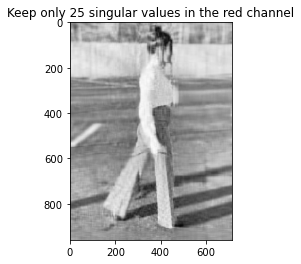

In [77]:
r=25
new_Sigma=Sigma[0:r,0:r]
new_U=U[:,0:r]
new_Vt=Vt[0:r,:]
product_r=new_U.dot(new_Sigma.dot(new_Vt))
plt.imshow(product_r,cmap=cm.Greys_r)
plt.title(f"Keep only {r} singular values in the red channel")

# I will repeat the same process for the green and blue channels

Text(0.5, 1.0, 'Keep only 25 singular values in the green channel')

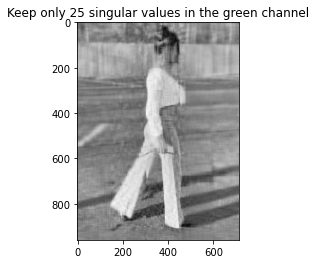

In [78]:
U,sigma,Vt=np.linalg.svd(G)
new_sigma=sigma[0:r]
new_Sigma=np.diag(new_sigma)
new_U=U[:,0:r]
new_Vt=Vt[0:r,:]
product_g=new_U.dot(new_Sigma.dot(new_Vt))
plt.imshow(product_g,cmap=cm.Greys_r)
plt.title(f"Keep only {r} singular values in the green channel")

Text(0.5, 1.0, 'Keep only 25 singular values in the blue channel')

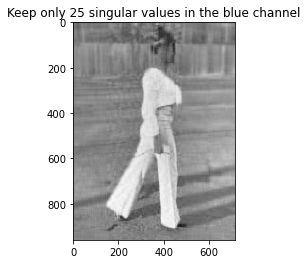

In [79]:
U,sigma,Vt=np.linalg.svd(B)
new_sigma=sigma[0:r]
new_Sigma=np.diag(new_sigma)
new_U=U[:,0:r]
new_Vt=Vt[0:r,:]
product_b=new_U.dot(new_Sigma.dot(new_Vt))
plt.imshow(product_b,cmap=cm.Greys_r)
plt.title(f"Keep only {r} singular values in the blue channel")

# Now layer the reduced rank red, green and blue channels to see the compressed color image. Let's plot it right next to the original image to see the effect of the compression. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


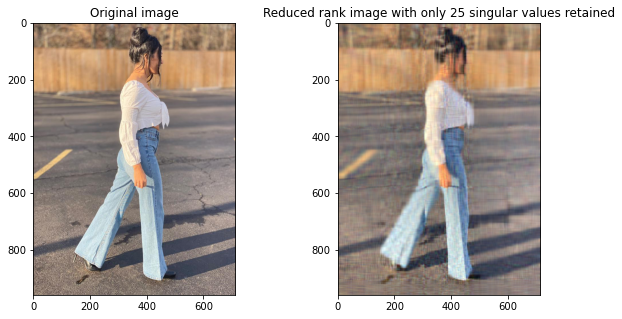

In [100]:
product_r_1=product_r.astype(int)
product_g_1=product_g.astype(int)
product_b_1=product_b.astype(int)
reduced_rank_image=np.dstack((product_r_1,product_g_1,product_b_1))

fig,subs=plt.subplots(nrows=1, ncols=2, figsize=(10,5))
subs[0].imshow(picture)
subs[0].title.set_text('Original image')
subs[1].imshow(reduced_rank_image)
subs[1].title.set_text(f'Reduced rank image with only {r} singular values retained')

# Check out this image with different number of singular values retained. This is from somewhere on the internet.
![image](Fig_compression.jpeg)